In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import integrate
from scipy.stats import linregress
import scipy.stats as sc
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
#Constants
a=6371220 #radius of earth in m
L=2.5E6 #Latent heat in atmosphere
L_ice=3.34e5 #Latent heat of fusion
g=9.81 #Acceleration from gravity
conv_pw=1e15 #Conversion from watts to PW
cp=1007  

In [3]:
#Make some standardized coordinates

lats = np.arange(-90, 91, 1)
geometry = 2 * np.pi * np.cos(np.deg2rad(np.asarray(lats))) * a / g
levels_pa = np.array([100, 500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000,
             70000, 85000, 92500, 100000])
levels_hPa = levels_pa / 100

confidence_level = 0.95

In [4]:
amip_ds = xr.open_dataset('../amip_aht.nc').sel(time=slice('1980-01-01','2014-12-31'))
hist_ds = xr.open_dataset('../hist_aht.nc').sel(time=slice('1980-01-01','2014-12-31'))
reanalysis_ds = xr.open_dataset('../reanalysis_aht.nc').sel(time=slice('1980-01-01','2014-12-31'))
cesm_ds = xr.open_dataset('../CESM2_LENS2_aht_ds_1850_2014.nc').sel(time=slice('1980-01-01','2014-12-31'))

amip_trends = amip_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)
hist_trends = hist_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)
reanalysis_trends = reanalysis_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)
cesm_trends = cesm_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)

In [5]:
amip_std_error = xr.open_dataset('../amip_ds_trend_std_error.nc')
hist_std_error = xr.open_dataset('../hist_ds_trend_std_error.nc')
reanalysis_std_error = xr.open_dataset('../reanalysis_ds_trend_std_error.nc')
cesm_std_error = xr.open_dataset('../cesm2_le_ds_trend_std_error.nc')

In [6]:
amip_Neff = xr.open_dataset('../amip_ds_trend_Neff.nc')
hist_Neff = xr.open_dataset('../hist_ds_trend_Neff.nc')
reanalysis_Neff = xr.open_dataset('../reanalysis_ds_trend_Neff.nc')
cesm_Neff = xr.open_dataset('../cesm2_le_ds_trend_Neff.nc')

<ipython-input-11-75dd76797fa5>:66: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')
<ipython-input-11-75dd76797fa5>:81: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')
<ipython-input-11-75dd76797fa5>:96: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), e

0.4715274062831123


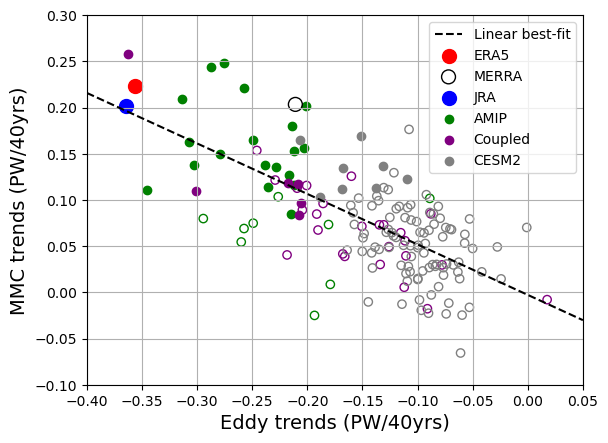

In [11]:
lat_slice = slice(-60, -40)
multiplier = 40 / 1e15

#classes = ['ERA5', 'MERRA2', 'JRA55', 'AMIP', 'Coupled', 'CESM2']
#values = [0, 1, 2, 3, 4, 5]
#colors = ListedColormap(['r','k','b', 'g', 'purple', 'grey'])

field1 = 'eddy_aht_polyfit_coefficients'
field2 = 'mmc_aht_polyfit_coefficients'

field_err1 = 'eddy_aht'
field_err2 = 'mmc_aht'

field1_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_amip = amip_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_amip) * multiplier

field1_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_hist = hist_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_hist) * multiplier

field1_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_reanalysis = reanalysis_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis) * multiplier

field1_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_cesm = cesm_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm) * multiplier

field1_data = []
field1_data.append((field1_amip).values)
field1_data.append((field1_hist).values)
field1_data.append((field1_reanalysis).values)
field1_data.append((field1_cesm).values)
field1_data = np.hstack(field1_data)

field2_data = []
field2_data.append((field2_amip).values)
field2_data.append((field2_hist).values)
field2_data.append((field2_reanalysis).values)
field2_data.append((field2_cesm).values)
field2_data = np.hstack(field2_data)


linregress_pr_aht = linregress(field1_data, field2_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.4, 0.05, 50), int_val + np.linspace(-0.4, 0.05, 50) * slope, '--', color='k',
        label='Linear best-fit')

amip_Neff_val1 = amip_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
amip_Neff_val2 = amip_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
t_vals_amip = sc.t.ppf((1 + confidence_level)/2, (amip_Neff_val1.values + amip_Neff_val2.values)/2)
t_values1_amip = field1_amip / (multiplier * amip_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
t_values2_amip = field2_amip / (multiplier * amip_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
eddy_sig_amip = xr.where(abs(t_values1_amip) > t_vals_amip, True, False)
mmc_sig_amip = xr.where(abs(t_values2_amip) > t_vals_amip, True, False)

both_sig_amip = np.logical_and(eddy_sig_amip, mmc_sig_amip)

plt.scatter(field1_amip.where(both_sig_amip), field2_amip.where(both_sig_amip), color='g')
plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')

#scatter1 = plt.scatter(field1_amip, field2_amip, color='g', label='AMIP')

hist_Neff_val1 = hist_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
hist_Neff_val2 = hist_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
t_vals_hist = sc.t.ppf((1 + confidence_level)/2, (hist_Neff_val1.values + hist_Neff_val2.values)/2)
t_values1_hist = field1_hist / (multiplier * hist_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
t_values2_hist = field2_hist / (multiplier * hist_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
eddy_sig_hist = xr.where(abs(t_values1_hist) > t_vals_hist, True, False)
mmc_sig_hist = xr.where(abs(t_values2_hist) > t_vals_hist, True, False)

both_sig_hist = np.logical_and(eddy_sig_hist, mmc_sig_hist)

plt.scatter(field1_hist.where(both_sig_hist), field2_hist.where(both_sig_hist), color='purple')
plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')

#scatter2 = plt.scatter(field1_hist, field2_hist, color='purple', label='Coupled')

cesm_Neff_val1 = cesm_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
cesm_Neff_val2 = cesm_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
t_vals_cesm = sc.t.ppf((1 + confidence_level)/2, (cesm_Neff_val1.values + cesm_Neff_val2.values)/2)
t_values1_cesm = field1_cesm / (multiplier * cesm_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
t_values2_cesm = field2_cesm / (multiplier * cesm_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
eddy_sig_cesm = xr.where(abs(t_values1_cesm) > t_vals_cesm, True, False)
mmc_sig_cesm = xr.where(abs(t_values2_cesm) > t_vals_cesm, True, False)

both_sig_cesm = np.logical_and(eddy_sig_cesm, mmc_sig_cesm)

plt.scatter(field1_cesm.where(both_sig_cesm), field2_cesm.where(both_sig_cesm), color='grey')
plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), edgecolor='grey', facecolor='')

#scatter3 = plt.scatter(field1_cesm, field2_cesm, color='grey')

#plt.scatter(field1_reanalysis, field2_reanalysis, color='k', label='Reanalysis')


reanalysis_Neff_val1 = reanalysis_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
reanalysis_Neff_val2 = reanalysis_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
t_vals_reanalysis = sc.t.ppf((1 + confidence_level)/2, (reanalysis_Neff_val1.values + reanalysis_Neff_val2.values)/2)
t_values1_reanalysis = field1_reanalysis / (multiplier * reanalysis_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
t_values2_reanalysis = field2_reanalysis / (multiplier * reanalysis_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
eddy_sig_reanalysis = xr.where(abs(t_values1_reanalysis) > t_vals_reanalysis, True, False)
mmc_sig_reanalysis = xr.where(abs(t_values2_reanalysis) > t_vals_reanalysis, True, False)

both_sig_reanalysis = np.logical_and(eddy_sig_reanalysis, mmc_sig_reanalysis)

reanalysis_color_dict = dict(zip(['ERA5', 'MERRA', 'JRA'], ['r','k','b']))

for model in both_sig_reanalysis.model:
    
    if both_sig_reanalysis.sel(model=model) == True:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    color=reanalysis_color_dict[str(model.values)], s=100)
        
    elif both_sig_reanalysis.sel(model=model) == False:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    edgecolor=reanalysis_color_dict[str(model.values)], facecolor='', s=100)
        

#field1_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#field2_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#size_list = [100, 100, 100, 30, 30, 30]
#scatter4 = plt.scatter(field1_reanalysis_dummy, field2_reanalysis_dummy, c=values, cmap=colors, s=)
#plt.legend(handles=scatter4.legend_elements()[0], labels=classes, fontsize=12, loc=1)

plt.scatter(20, 20, color='r', s=100, label='ERA5')
plt.scatter(20, 20, edgecolor='k', color='', s=100, label='MERRA')
plt.scatter(20, 20, color='b', s=100, label='JRA')
plt.scatter(20, 20, color='g', label='AMIP')
plt.scatter(20, 20, color='purple', label='Coupled')
plt.scatter(20, 20, color='grey', label='CESM2')

plt.legend(loc=1, fontsize=10)


plt.xlim([-0.4, 0.05])
plt.ylim([-0.1, 0.3])
#plt.title(f'N. Hem. (50-75N) Eddy vs. MMC AHT trends in AMIP (slope: {round(slope_amip, 2)}) \n and in Historical (slope: {round(slope_hist, 2)})')
plt.xlabel('Eddy trends (PW/40yrs)', fontsize=14)
plt.ylabel('MMC trends (PW/40yrs)', fontsize=14)
plt.grid()
#plt.savefig('../figures/s_hem_eddy_mmc_scatter')

print(r_val **2)
plt.show()


<ipython-input-12-ce92ec771115>:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')
<ipython-input-12-ce92ec771115>:80: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')
<ipython-input-12-ce92ec771115>:95: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), e

0.17870676576364597


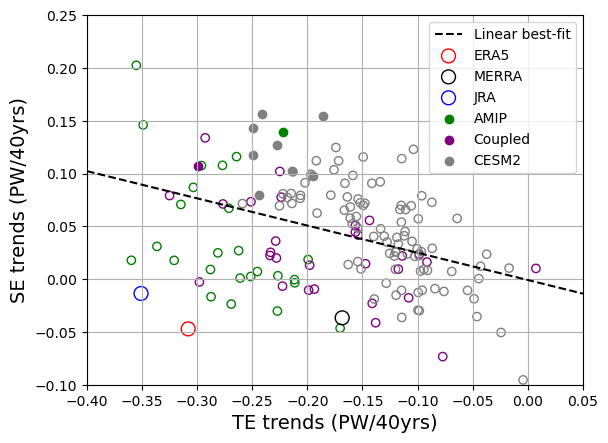

In [12]:
lat_slice = slice(-60, -40)
multiplier = 40 / 1e15

classes = ['ERA5', 'MERRA2', 'JRA55', 'AMIP', 'Coupled', 'CESM2']
values = [0, 1, 2, 3, 4, 5]
colors = ListedColormap(['r','k','b', 'g', 'purple', 'grey'])

field1 = 'te_aht_polyfit_coefficients'
field2 = 'se_aht_polyfit_coefficients'
field_err1 = 'te_aht'
field_err2 = 'se_aht'

field1_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_amip = amip_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_amip) * multiplier

field1_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_hist = hist_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_hist) * multiplier

field1_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_reanalysis = reanalysis_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis) * multiplier

field1_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_cesm = cesm_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm) * multiplier

field1_data = []
field1_data.append((field1_amip).values)
field1_data.append((field1_hist).values)
field1_data.append((field1_reanalysis).values)
field1_data.append((field1_cesm).values)
field1_data = np.hstack(field1_data)

field2_data = []
field2_data.append((field2_amip).values)
field2_data.append((field2_hist).values)
field2_data.append((field2_reanalysis).values)
field2_data.append((field2_cesm).values)
field2_data = np.hstack(field2_data)


linregress_pr_aht = linregress(field1_data, field2_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.4, 0.05, 50), int_val + np.linspace(-0.4, 0.05, 50) * slope, '--', color='k',
        label='Linear best-fit')

amip_Neff_val1 = amip_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
amip_Neff_val2 = amip_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
t_vals_amip = sc.t.ppf((1 + confidence_level)/2, (amip_Neff_val1.values + amip_Neff_val2.values)/2)
t_values1_amip = field1_amip / (multiplier * amip_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
t_values2_amip = field2_amip / (multiplier * amip_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
eddy_sig_amip = xr.where(abs(t_values1_amip) > t_vals_amip, True, False)
mmc_sig_amip = xr.where(abs(t_values2_amip) > t_vals_amip, True, False)

both_sig_amip = np.logical_and(eddy_sig_amip, mmc_sig_amip)

plt.scatter(field1_amip.where(both_sig_amip), field2_amip.where(both_sig_amip), color='g')
plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')

#scatter1 = plt.scatter(field1_amip, field2_amip, color='g', label='AMIP')

hist_Neff_val1 = hist_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
hist_Neff_val2 = hist_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
t_vals_hist = sc.t.ppf((1 + confidence_level)/2, (hist_Neff_val1.values + hist_Neff_val2.values)/2)
t_values1_hist = field1_hist / (multiplier * hist_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
t_values2_hist = field2_hist / (multiplier * hist_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
eddy_sig_hist = xr.where(abs(t_values1_hist) > t_vals_hist, True, False)
mmc_sig_hist = xr.where(abs(t_values2_hist) > t_vals_hist, True, False)

both_sig_hist = np.logical_and(eddy_sig_hist, mmc_sig_hist)

plt.scatter(field1_hist.where(both_sig_hist), field2_hist.where(both_sig_hist), color='purple')
plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')

#scatter2 = plt.scatter(field1_hist, field2_hist, color='purple', label='Coupled')

cesm_Neff_val1 = cesm_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
cesm_Neff_val2 = cesm_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
t_vals_cesm = sc.t.ppf((1 + confidence_level)/2, (cesm_Neff_val1.values + cesm_Neff_val2.values)/2)
t_values1_cesm = field1_cesm / (multiplier * cesm_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
t_values2_cesm = field2_cesm / (multiplier * cesm_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
eddy_sig_cesm = xr.where(abs(t_values1_cesm) > t_vals_cesm, True, False)
mmc_sig_cesm = xr.where(abs(t_values2_cesm) > t_vals_cesm, True, False)

both_sig_cesm = np.logical_and(eddy_sig_cesm, mmc_sig_cesm)

plt.scatter(field1_cesm.where(both_sig_cesm), field2_cesm.where(both_sig_cesm), color='grey')
plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), edgecolor='grey', facecolor='')

#scatter3 = plt.scatter(field1_cesm, field2_cesm, color='grey')

#plt.scatter(field1_reanalysis, field2_reanalysis, color='k', label='Reanalysis')


reanalysis_Neff_val1 = reanalysis_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
reanalysis_Neff_val2 = reanalysis_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
t_vals_reanalysis = sc.t.ppf((1 + confidence_level)/2, (reanalysis_Neff_val1.values + reanalysis_Neff_val2.values)/2)
t_values1_reanalysis = field1_reanalysis / (multiplier * reanalysis_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
t_values2_reanalysis = field2_reanalysis / (multiplier * reanalysis_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
eddy_sig_reanalysis = xr.where(abs(t_values1_reanalysis) > t_vals_reanalysis, True, False)
mmc_sig_reanalysis = xr.where(abs(t_values2_reanalysis) > t_vals_reanalysis, True, False)

both_sig_reanalysis = np.logical_and(eddy_sig_reanalysis, mmc_sig_reanalysis)

reanalysis_color_dict = dict(zip(['ERA5', 'MERRA', 'JRA'], ['r','k','b']))

for model in both_sig_reanalysis.model:
    
    if both_sig_reanalysis.sel(model=model) == True:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    color=reanalysis_color_dict[str(model.values)], s=100)
        
    elif both_sig_reanalysis.sel(model=model) == False:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    edgecolor=reanalysis_color_dict[str(model.values)], facecolor='', s=100)
        

#field1_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#field2_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#size_list = [100, 100, 100, 30, 30, 30]
#scatter4 = plt.scatter(field1_reanalysis_dummy, field2_reanalysis_dummy, c=values, cmap=colors, s=)
#plt.legend(handles=scatter4.legend_elements()[0], labels=classes, fontsize=12, loc=1)

plt.scatter(20, 20, edgecolor='r', color='', s=100, label='ERA5')
plt.scatter(20, 20, edgecolor='k', color='', s=100, label='MERRA')
plt.scatter(20, 20, edgecolor='b', color='', s=100, label='JRA')
plt.scatter(20, 20, color='g', label='AMIP')
plt.scatter(20, 20, color='purple', label='Coupled')
plt.scatter(20, 20, color='grey', label='CESM2')

plt.legend(loc=1, fontsize=10)
#plt.gca().invert_xaxis()

#plt.plot(np.linspace(-.4, 0, 50), -np.linspace(-.4, 0, 50),  color='k')

plt.xlim([-0.4, 0.05])
plt.ylim([-0.1, 0.25])
#plt.title(f'N. Hem. (50-75N) Eddy vs. MMC AHT trends in AMIP (slope: {round(slope_amip, 2)}) \n and in Historical (slope: {round(slope_hist, 2)})')
plt.xlabel('TE trends (PW/40yrs)', fontsize=14)
plt.ylabel('SE trends (PW/40yrs)', fontsize=14)
plt.grid()
#plt.savefig('../figures/s_hem_te_se_scatter')

print(r_val **2)
plt.show()


<ipython-input-13-e53233bec64b>:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')
<ipython-input-13-e53233bec64b>:80: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')
<ipython-input-13-e53233bec64b>:95: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), e

0.2543789993391718


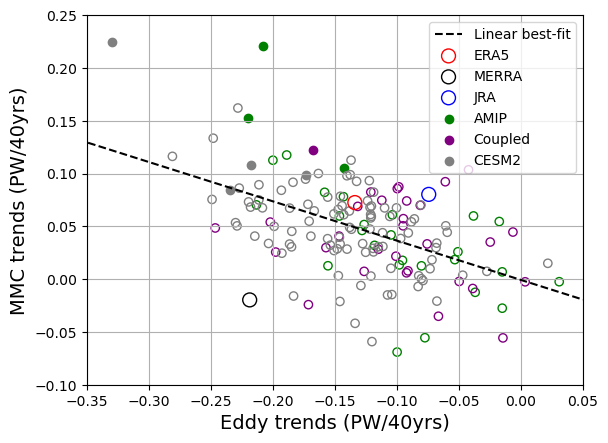

In [13]:
lat_slice = slice(40, 60)
multiplier = 40 / 1e15

classes = ['ERA5', 'MERRA2', 'JRA55', 'AMIP', 'Coupled', 'CESM2']
values = [0, 1, 2, 3, 4, 5]
colors = ListedColormap(['r','k','b', 'g', 'purple', 'grey'])

field1 = 'eddy_aht_polyfit_coefficients'
field2 = 'mmc_aht_polyfit_coefficients'
field_err1 = 'eddy_aht'
field_err2 = 'mmc_aht'

field1_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_amip = amip_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_amip) * multiplier

field1_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_hist = hist_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_hist) * multiplier

field1_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_reanalysis = reanalysis_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis) * multiplier

field1_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_cesm = cesm_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm) * multiplier

field1_data = []
field1_data.append((field1_amip).values)
field1_data.append((field1_hist).values)
field1_data.append((field1_reanalysis).values)
field1_data.append((field1_cesm).values)
field1_data = np.hstack(field1_data)

field2_data = []
field2_data.append((field2_amip).values)
field2_data.append((field2_hist).values)
field2_data.append((field2_reanalysis).values)
field2_data.append((field2_cesm).values)
field2_data = np.hstack(field2_data)


linregress_pr_aht = linregress(field1_data, field2_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.4, 0.05, 50), int_val + np.linspace(-0.4, 0.05, 50) * slope, '--', color='k',
        label='Linear best-fit')

amip_Neff_val1 = amip_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
amip_Neff_val2 = amip_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
t_vals_amip = sc.t.ppf((1 + confidence_level)/2, (amip_Neff_val1.values + amip_Neff_val2.values)/2)
t_values1_amip = field1_amip / (multiplier * amip_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
t_values2_amip = field2_amip / (multiplier * amip_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
eddy_sig_amip = xr.where(abs(t_values1_amip) > t_vals_amip, True, False)
mmc_sig_amip = xr.where(abs(t_values2_amip) > t_vals_amip, True, False)

both_sig_amip = np.logical_and(eddy_sig_amip, mmc_sig_amip)

plt.scatter(field1_amip.where(both_sig_amip), field2_amip.where(both_sig_amip), color='g')
plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')

#scatter1 = plt.scatter(field1_amip, field2_amip, color='g', label='AMIP')

hist_Neff_val1 = hist_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
hist_Neff_val2 = hist_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
t_vals_hist = sc.t.ppf((1 + confidence_level)/2, (hist_Neff_val1.values + hist_Neff_val2.values)/2)
t_values1_hist = field1_hist / (multiplier * hist_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
t_values2_hist = field2_hist / (multiplier * hist_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
eddy_sig_hist = xr.where(abs(t_values1_hist) > t_vals_hist, True, False)
mmc_sig_hist = xr.where(abs(t_values2_hist) > t_vals_hist, True, False)

both_sig_hist = np.logical_and(eddy_sig_hist, mmc_sig_hist)

plt.scatter(field1_hist.where(both_sig_hist), field2_hist.where(both_sig_hist), color='purple')
plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')

#scatter2 = plt.scatter(field1_hist, field2_hist, color='purple', label='Coupled')

cesm_Neff_val1 = cesm_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
cesm_Neff_val2 = cesm_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
t_vals_cesm = sc.t.ppf((1 + confidence_level)/2, (cesm_Neff_val1.values + cesm_Neff_val2.values)/2)
t_values1_cesm = field1_cesm / (multiplier * cesm_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
t_values2_cesm = field2_cesm / (multiplier * cesm_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
eddy_sig_cesm = xr.where(abs(t_values1_cesm) > t_vals_cesm, True, False)
mmc_sig_cesm = xr.where(abs(t_values2_cesm) > t_vals_cesm, True, False)

both_sig_cesm = np.logical_and(eddy_sig_cesm, mmc_sig_cesm)

plt.scatter(field1_cesm.where(both_sig_cesm), field2_cesm.where(both_sig_cesm), color='grey')
plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), edgecolor='grey', facecolor='')

#scatter3 = plt.scatter(field1_cesm, field2_cesm, color='grey')

#plt.scatter(field1_reanalysis, field2_reanalysis, color='k', label='Reanalysis')


reanalysis_Neff_val1 = reanalysis_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
reanalysis_Neff_val2 = reanalysis_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
t_vals_reanalysis = sc.t.ppf((1 + confidence_level)/2, (reanalysis_Neff_val1.values + reanalysis_Neff_val2.values)/2)
t_values1_reanalysis = field1_reanalysis / (multiplier * reanalysis_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
t_values2_reanalysis = field2_reanalysis / (multiplier * reanalysis_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
eddy_sig_reanalysis = xr.where(abs(t_values1_reanalysis) > t_vals_reanalysis, True, False)
mmc_sig_reanalysis = xr.where(abs(t_values2_reanalysis) > t_vals_reanalysis, True, False)

both_sig_reanalysis = np.logical_and(eddy_sig_reanalysis, mmc_sig_reanalysis)

reanalysis_color_dict = dict(zip(['ERA5', 'MERRA', 'JRA'], ['r','k','b']))

for model in both_sig_reanalysis.model:
    
    if both_sig_reanalysis.sel(model=model) == True:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    color=reanalysis_color_dict[str(model.values)], s=100)
        
    elif both_sig_reanalysis.sel(model=model) == False:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    edgecolor=reanalysis_color_dict[str(model.values)], facecolor='', s=100)
        

#field1_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#field2_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#size_list = [100, 100, 100, 30, 30, 30]
#scatter4 = plt.scatter(field1_reanalysis_dummy, field2_reanalysis_dummy, c=values, cmap=colors, s=)
#plt.legend(handles=scatter4.legend_elements()[0], labels=classes, fontsize=12, loc=1)

plt.scatter(20, 20, edgecolor='r', color='', s=100, label='ERA5')
plt.scatter(20, 20, edgecolor='k', color='', s=100, label='MERRA')
plt.scatter(20, 20, edgecolor='b', color='', s=100, label='JRA')
plt.scatter(20, 20, color='g', label='AMIP')
plt.scatter(20, 20, color='purple', label='Coupled')
plt.scatter(20, 20, color='grey', label='CESM2')

plt.legend(loc=1, fontsize=10)
plt.xlim([-0.35, 0.05])
plt.ylim([-0.1, 0.25])
#plt.title(f'N. Hem. (50-75N) Eddy vs. MMC AHT trends in AMIP (slope: {round(slope_amip, 2)}) \n and in Historical (slope: {round(slope_hist, 2)})')
plt.xlabel('Eddy trends (PW/40yrs)', fontsize=14)
plt.ylabel('MMC trends (PW/40yrs)', fontsize=14)
plt.grid()
#plt.savefig('../figures/n_hem_eddy_mmc_scatter')

print(r_val **2)
plt.show()


<ipython-input-14-4432e20aa5cc>:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')
<ipython-input-14-4432e20aa5cc>:80: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')
<ipython-input-14-4432e20aa5cc>:95: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), e

0.3386946807134576


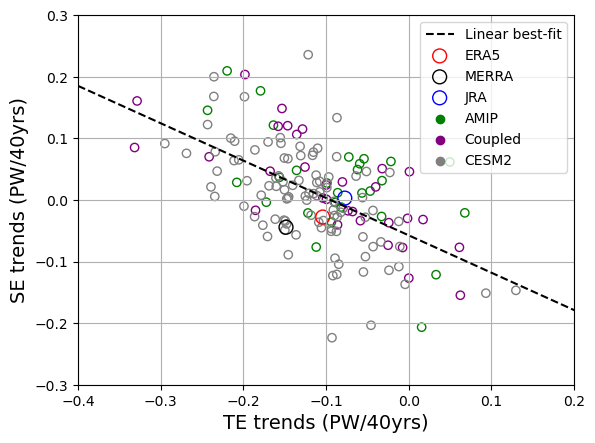

In [14]:
lat_slice = slice(40, 60)
multiplier = 40 / 1e15

classes = ['ERA5', 'MERRA2', 'JRA55', 'AMIP', 'Coupled', 'CESM2']
values = [0, 1, 2, 3, 4, 5]
colors = ListedColormap(['r','k','b', 'g', 'purple', 'grey'])

field1 = 'te_aht_polyfit_coefficients'
field2 = 'se_aht_polyfit_coefficients'
field_err1 = 'te_aht'
field_err2 = 'se_aht'

field1_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_amip = amip_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_amip = amip_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_amip) * multiplier

field1_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_hist = hist_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_hist = hist_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_hist) * multiplier

field1_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_reanalysis = reanalysis_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_reanalysis = reanalysis_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis) * multiplier

field1_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).min('latitude') * multiplier
field1_idxs_cesm = cesm_trends[field1].sel(degree=1).sel(latitude=lat_slice).argmin('latitude')
field2_cesm = cesm_trends[field2].sel(degree=1).sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm) * multiplier

field1_data = []
field1_data.append((field1_amip).values)
field1_data.append((field1_hist).values)
field1_data.append((field1_reanalysis).values)
field1_data.append((field1_cesm).values)
field1_data = np.hstack(field1_data)

field2_data = []
field2_data.append((field2_amip).values)
field2_data.append((field2_hist).values)
field2_data.append((field2_reanalysis).values)
field2_data.append((field2_cesm).values)
field2_data = np.hstack(field2_data)


linregress_pr_aht = linregress(field1_data, field2_data)
slope = linregress_pr_aht.slope
int_val = linregress_pr_aht.intercept
r_val = linregress_pr_aht.rvalue
p_val = linregress_pr_aht.pvalue


plt.plot(np.linspace(-0.4, 0.25, 50), int_val + np.linspace(-0.4, 0.25, 50) * slope, '--', color='k',
        label='Linear best-fit')

amip_Neff_val1 = amip_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
amip_Neff_val2 = amip_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip)
t_vals_amip = sc.t.ppf((1 + confidence_level)/2, (amip_Neff_val1.values + amip_Neff_val2.values)/2)
t_values1_amip = field1_amip / (multiplier * amip_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
t_values2_amip = field2_amip / (multiplier * amip_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_amip))
eddy_sig_amip = xr.where(abs(t_values1_amip) > t_vals_amip, True, False)
mmc_sig_amip = xr.where(abs(t_values2_amip) > t_vals_amip, True, False)

both_sig_amip = np.logical_and(eddy_sig_amip, mmc_sig_amip)

plt.scatter(field1_amip.where(both_sig_amip), field2_amip.where(both_sig_amip), color='g')
plt.scatter(field1_amip.where(~both_sig_amip), field2_amip.where(~both_sig_amip), edgecolor='g', facecolor='')

#scatter1 = plt.scatter(field1_amip, field2_amip, color='g', label='AMIP')

hist_Neff_val1 = hist_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
hist_Neff_val2 = hist_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist)
t_vals_hist = sc.t.ppf((1 + confidence_level)/2, (hist_Neff_val1.values + hist_Neff_val2.values)/2)
t_values1_hist = field1_hist / (multiplier * hist_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
t_values2_hist = field2_hist / (multiplier * hist_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_hist))
eddy_sig_hist = xr.where(abs(t_values1_hist) > t_vals_hist, True, False)
mmc_sig_hist = xr.where(abs(t_values2_hist) > t_vals_hist, True, False)

both_sig_hist = np.logical_and(eddy_sig_hist, mmc_sig_hist)

plt.scatter(field1_hist.where(both_sig_hist), field2_hist.where(both_sig_hist), color='purple')
plt.scatter(field1_hist.where(~both_sig_hist), field2_hist.where(~both_sig_hist), edgecolor='purple', facecolor='')

#scatter2 = plt.scatter(field1_hist, field2_hist, color='purple', label='Coupled')

cesm_Neff_val1 = cesm_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
cesm_Neff_val2 = cesm_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm)
t_vals_cesm = sc.t.ppf((1 + confidence_level)/2, (cesm_Neff_val1.values + cesm_Neff_val2.values)/2)
t_values1_cesm = field1_cesm / (multiplier * cesm_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
t_values2_cesm = field2_cesm / (multiplier * cesm_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_cesm))
eddy_sig_cesm = xr.where(abs(t_values1_cesm) > t_vals_cesm, True, False)
mmc_sig_cesm = xr.where(abs(t_values2_cesm) > t_vals_cesm, True, False)

both_sig_cesm = np.logical_and(eddy_sig_cesm, mmc_sig_cesm)

plt.scatter(field1_cesm.where(both_sig_cesm), field2_cesm.where(both_sig_cesm), color='grey')
plt.scatter(field1_cesm.where(~both_sig_cesm), field2_cesm.where(~both_sig_cesm), edgecolor='grey', facecolor='')

#scatter3 = plt.scatter(field1_cesm, field2_cesm, color='grey')

#plt.scatter(field1_reanalysis, field2_reanalysis, color='k', label='Reanalysis')


reanalysis_Neff_val1 = reanalysis_Neff[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
reanalysis_Neff_val2 = reanalysis_Neff[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis)
t_vals_reanalysis = sc.t.ppf((1 + confidence_level)/2, (reanalysis_Neff_val1.values + reanalysis_Neff_val2.values)/2)
t_values1_reanalysis = field1_reanalysis / (multiplier * reanalysis_std_error[field_err1].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
t_values2_reanalysis = field2_reanalysis / (multiplier * reanalysis_std_error[field_err2].sel(latitude=lat_slice).isel(latitude=field1_idxs_reanalysis))
eddy_sig_reanalysis = xr.where(abs(t_values1_reanalysis) > t_vals_reanalysis, True, False)
mmc_sig_reanalysis = xr.where(abs(t_values2_reanalysis) > t_vals_reanalysis, True, False)

both_sig_reanalysis = np.logical_and(eddy_sig_reanalysis, mmc_sig_reanalysis)

reanalysis_color_dict = dict(zip(['ERA5', 'MERRA', 'JRA'], ['r','k','b']))

for model in both_sig_reanalysis.model:
    
    if both_sig_reanalysis.sel(model=model) == True:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    color=reanalysis_color_dict[str(model.values)], s=100)
        
    elif both_sig_reanalysis.sel(model=model) == False:
        plt.scatter(field1_reanalysis.sel(model=model), field2_reanalysis.sel(model=model),
                    edgecolor=reanalysis_color_dict[str(model.values)], facecolor='', s=100)
        

#field1_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#field2_reanalysis_dummy = [20, 20, 20, 20, 20, 20]
#size_list = [100, 100, 100, 30, 30, 30]
#scatter4 = plt.scatter(field1_reanalysis_dummy, field2_reanalysis_dummy, c=values, cmap=colors, s=)
#plt.legend(handles=scatter4.legend_elements()[0], labels=classes, fontsize=12, loc=1)

plt.scatter(20, 20, edgecolor='r', color='', s=100, label='ERA5')
plt.scatter(20, 20, edgecolor='k', color='', s=100, label='MERRA')
plt.scatter(20, 20, edgecolor='b', color='', s=100, label='JRA')
plt.scatter(20, 20, color='g', label='AMIP')
plt.scatter(20, 20, color='purple', label='Coupled')
plt.scatter(20, 20, color='grey', label='CESM2')

plt.legend(loc=1, fontsize=10)
plt.xlim([-0.4, 0.2])
plt.ylim([-0.3, 0.3])
#plt.title(f'N. Hem. (50-75N) Eddy vs. MMC AHT trends in AMIP (slope: {round(slope_amip, 2)}) \n and in Historical (slope: {round(slope_hist, 2)})')
plt.xlabel('TE trends (PW/40yrs)', fontsize=14)
plt.ylabel('SE trends (PW/40yrs)', fontsize=14)
plt.grid()
#plt.savefig('../figures/n_hem_te_se_scatter')

print(r_val **2)
plt.show()
